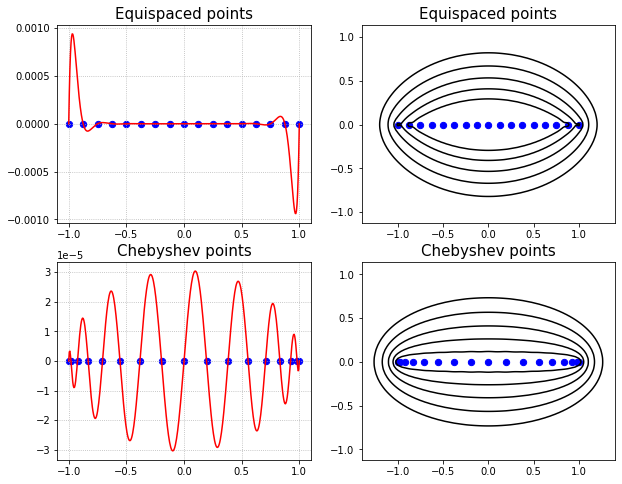

In [ ]:
import numpy as np
from numpy import polyfit, polyval, poly
from matplotlib import pyplot as plt

N = 16

fig, ax = plt.subplots(2,2,figsize=(10,8))
for i in [1,2]:
  if i == 1:
    s = 'Equispaced points'; x = -1 + 2*np.arange(0,N+1)/N
    j = 0
  else:
    s = 'Chebyshev points'; x = np.cos(np.pi*np.arange(0,N+1)/N)
    j = 1
  p = poly(x)
  xx = np.arange(-1,1 + .005,0.005)
  pp = polyval(p,xx)

  ax[i-1,0].scatter(x,x*0,s=40,color='blue')
  ax[i-1,0].plot(xx,pp,color='red')
  ax[i-1,0].grid(linestyle=':')
  ax[j,0].set_title(s,fontsize=15) ; ax[j,1].set_title(s,fontsize=15)
  ax[i-1,1].scatter(np.real(x),np.imag(x),s=40,color='blue')

  xgrid = np.arange(-1.4,1.4 +.02,0.02)
  ygrid = np.arange(-1.12,1.12 + .02,0.02)

  xx, yy = np.meshgrid(xgrid,ygrid)
  zz = xx + 1j * yy
  pp = polyval(p,zz)
  levels = (1/10) ** np.arange(4,0-1,-1)
  ax[i-1,1].contour(xx,yy,abs(pp),levels,colors=['black'])

ax[0,0].set_yticks([-0.001,-0.0005,0,0.0005,0.001])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly co

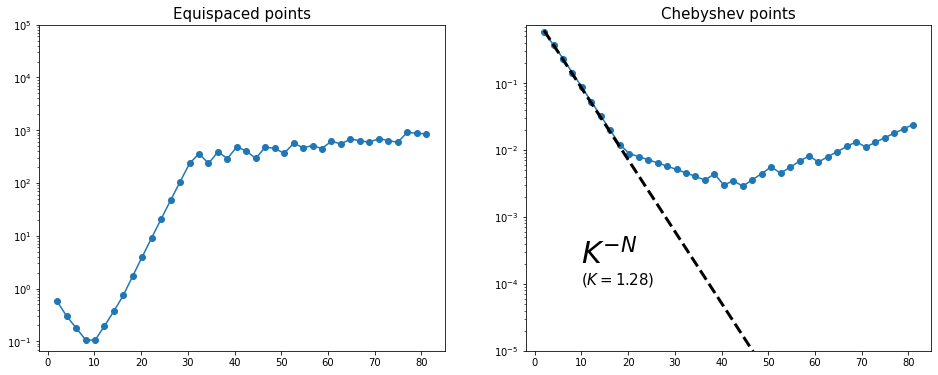

In [ ]:
plt.close()

N = np.linspace(2,81,40,endpoint=True)

xx = np.linspace(-1.01,1.01,1000,endpoint=True)
uu = 1 / (1 + 16 * xx**2)
fig, ax = plt.subplots(1,2,sharex=True,sharey=False,figsize=(16,6))

for i in [1,2]:
  error = []
  for n in N:
    if i == 1:
      s = 'Equispaced points'
      x = -1 + 2 * np.arange(0,n+1,1)/n
    else:
      s = 'Chebyshev points'
      x = np.cos(np.pi*np.arange(0,n+1,1)/n)
    u = 1 / (1 + 16 * x**2)
    
    p = polyfit(x,u,n)
    pp = polyval(p,xx)
    error.append(max(abs(uu-pp)))
  ax[i-1].plot(N,error,marker='o')
  ax[i-1].set_yscale('log')
  ax[i-1].set_title(s,fontsize=15)

ax[1].text(10,2*10**-4,r'$K^{-N}$',fontsize=30)
ax[1].text(10,10**-4,r'$(K=1.28)$',fontsize=15)
ax[0].set_ylim(0,10**5)
ax[1].set_ylim(10**-5,0)
ax[i-1].plot(N,1.28**-N,color='black',linestyle='--',linewidth=3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly co

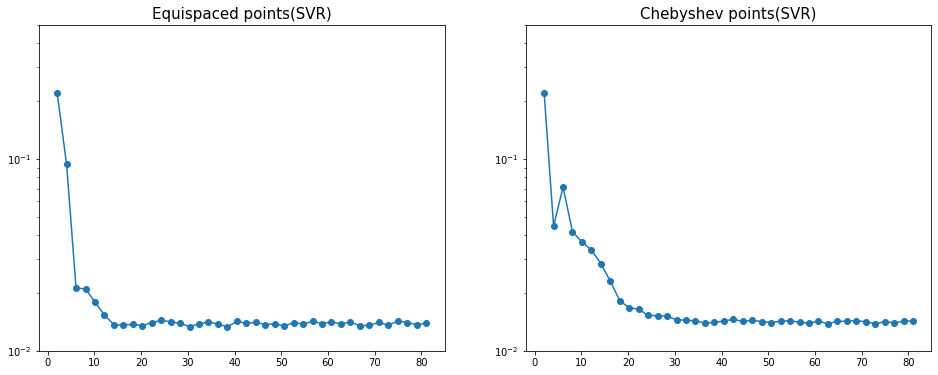

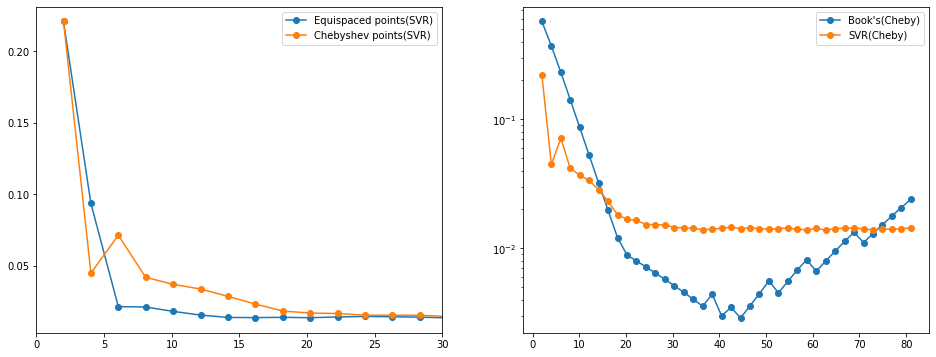

In [ ]:
plt.close()

from sklearn.svm import SVR

N = np.linspace(2,81,40,endpoint=True)

xx = np.linspace(-1.01,1.01,1000,endpoint=True)
uu = 1 / (1 + 16 * xx**2)

fig, ax = plt.subplots(1,2,sharex=True,sharey=False,figsize=(16,6))
fig1, ax1 = plt.subplots(1,2,figsize=(16,6))

for i in [1,2]:
  error, error1 = [], []
  for n in N:
    if i == 1:
      s = 'Equispaced points(SVR)'
      x = -1 + 2 * np.arange(0,n+1,1)/n
    else:
      s = 'Chebyshev points(SVR)'
      x = np.cos(np.pi*np.arange(0,n+1,1)/n)
    u = 1 / (1 + 16 * x**2)
    
    x = np.array(x).reshape(-1,1)
    xx = np.array(xx).reshape(-1,1)

    svm_reg = SVR(epsilon=0.01,gamma=20)
    svm_reg.fit(x,u)

    pp = svm_reg.predict(xx)

    
    p1 = polyfit(np.cos(np.pi*np.arange(0,n+1,1)/n),u,n)
    pp1 = polyval(p1,np.linspace(-1.01,1.01,1000,endpoint=True))
    error1.append(max(abs(uu-pp1)))

    error.append(max(abs(uu-pp)))
  ax[i-1].plot(N,error,marker='o')
  ax[i-1].set_yscale('log')
  ax[i-1].set_title(s,fontsize=15)
  ax1[0].plot(N,error,marker='o',label=s)
  ax1[0].legend(fontsize=10)

  if i == 2:
    ax1[1].plot(N,error1,marker='o',label="Book's(Cheby)")
    ax1[1].plot(N,error,marker='o',label='SVR(Cheby)')
    ax1[1].legend(fontsize=10)
ax[0].set_ylim(10**-2,0.5) ; ax[1].set_ylim(10**-2,0.5)
ax1[0].set_xlim(0,30)
ax1[1].set_yscale('log')

In [ ]:
plt.close()

def cheb(n):
  from numpy.matlib import repmat as repmat
  if n == 0:
    D = 0 ; x = 1
    return D,x
  else:
    x = np.cos(np.pi*np.arange(0,n+1,1)/n)
    c1 = np.array(np.ones(n-1)) ; c1 = np.append(c1,2) ; c1 = np.insert(c1,0,2)
    c2 = (-1)** np.arange(0,n +1,1)
    c = c1 * c2
    X = repmat(np.matrix(x).T,1,n+1)
    dX = X - X.T
    D = (np.matrix(c).T * 1/np.matrix(c)) / (dX+(np.eye(n+1)))
    D = D - np.diagflat(sum(D.T))
    return D,x

([<matplotlib.axis.XTick at 0x7f237b7056a0>,
 <a list of 5 Text major ticklabel objects>)

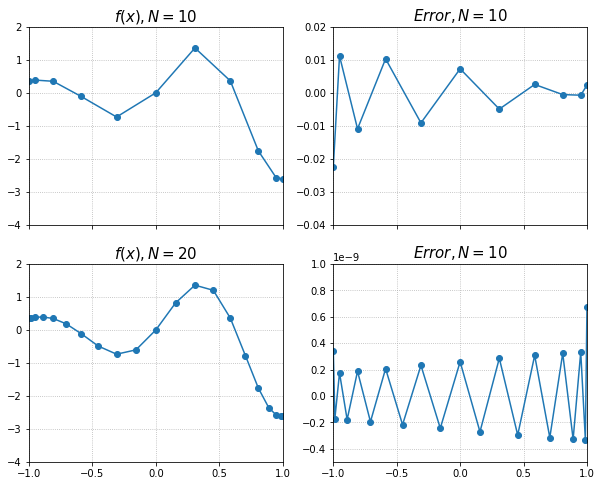

In [ ]:
xx = np.arange(-1,1 +0.01,0.01)
uu = (np.e ** xx) * np.sin(5 * xx)
fig, ax = plt.subplots(2,2,figsize=(10,8),sharex=True)
for N in [10,20]:
  i = int(N/10 -1)
  D,x = cheb(N)
  u = (np.e**x) * np.sin(5 * x)
  ax[i,0].plot(x,u,marker='o')
  ax[i,0].set_ylim(-4,2)
  ax[i,0].grid(linestyle=':')

  error = D*np.matrix(u).T - np.matrix((np.e**x)*(np.sin(5*x) + 5*np.cos(5*x))).T
  ax[i,1].plot(x,error,marker='o')
  ax[i,1].grid(linestyle=':')
  if N == 10:
    ax[i,1].set_ylim(-0.04,0.02)
    ax[i,0].set_title(r'$f(x),N=10$',fontsize=15)
    ax[i,1].set_title(r'$Error,N=10$',fontsize=15)
  else:
    ax[i,1].set_ylim(-5*(1/10**10),10*(1/10**10))
    ax[i,0].set_title(r'$f(x),N=20$',fontsize=15)
    ax[i,1].set_title(r'$Error,N=10$',fontsize=15)

plt.xlim(-1,1)
plt.xticks([-1,-0.5,0,0.5,1])

Text(30, 1e-05, '$(K=2.1)$')

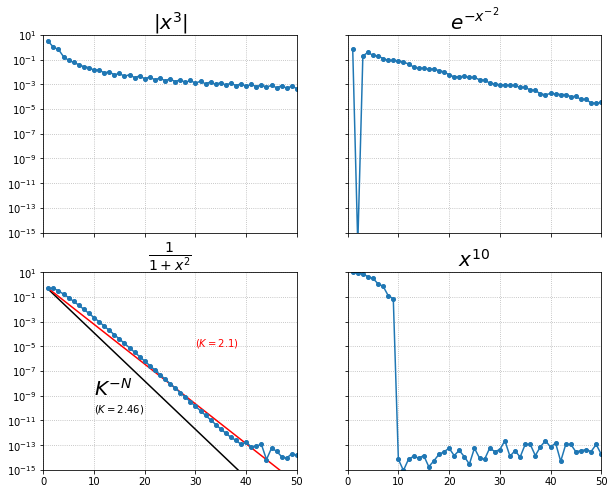

In [ ]:
plt.close()

Nmax = 50
E = np.zeros((4,Nmax))

n = np.arange(1,Nmax +1,1)

for N in n:
  D,x = cheb(N)
  v = abs(x) **3
  vprime = 3 *x *abs(x)
  E[0][N-1] = max(D*np.matrix(v).T - np.matrix(vprime).T)

  v = np.power(np.e,-x ** (-2))
  vprime = (2 * v) / (x **3)
  E[1][N-1] = max(D*np.matrix(v).T - np.matrix(vprime).T)

  v = 1 / (1+x **2)
  vprime = -2 * x * v **2
  E[2][N-1] = max(D*np.matrix(v).T - np.matrix(vprime).T)

  v = x**10
  vprime = 10* x **9
  E[3][N-1] = max(D*np.matrix(v).T - np.matrix(vprime).T)

fig, ax = plt.subplots(2,2,figsize=(10,8),sharex=True,sharey=True)

for i in [0,1,2,3]:
  if i == 0:
    j = 0
    s = r'$|x^3|$'
  elif i == 1:
    j = 0
    s = r'$e^{{-x}^{-2}}$'
  elif i == 2:
    j = 1
    s = r'$\frac{1}{1+x^2}$'
    ax[j,i%2].plot(n,(1/2.46)**n,color='black')
    ax[j,i%2].plot(n,(1/2.1)**n,color='red')
  elif i == 3:
    j = 1
    s = r'$x^{10}$'
  else:
    pass
  ax[j,i%2].plot(n,E[i],marker='o',markersize=4)
  ax[j,i%2].grid(linestyle=':')
  ax[j,i%2].set_title(s,fontsize=20)

plt.xlim(0,50)
plt.ylim(10**-15,10)
plt.yscale('log')
ax[1,0].text(10,10**-9,r'$K^{-N}$',fontsize=20)
ax[1,0].text(10,5*10**-11,r'$(K=2.46)$',fontsize=10)
ax[1,0].text(30,10**-5,r'$(K=2.1)$',fontsize=10,color='red')
